# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train (1).csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


# **Checking for imbalance data**

Class 0: 39922
Class 1: 5289
Proportion of class 0 is  88.3 %


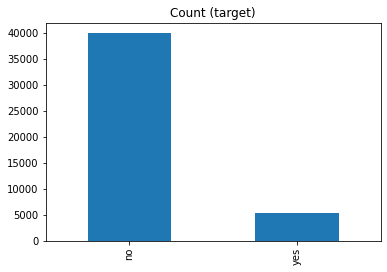

In [3]:
target_count = df.y.value_counts()
print('Class 0:', target_count['no'])
print('Class 1:', target_count['yes'])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

target_count.plot(kind='bar', title='Count (target)');

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [5]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

#**Data Cleaning**

In [6]:
df.shape

(45211, 11)

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df = df.drop_duplicates() # code to delete duplicates
df.shape

(45205, 11)

In [10]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [11]:
iqr = df.dur.quantile(0.75) - df.dur.quantile(0.25)
iqr
upper_threshold = df.dur.quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df.dur.quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
upper_threshold, lower_threshold


(643.0, -221.0)

In [12]:
df.dur = df.dur.clip(-221.0, 643.0)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
iqr1 = df.num_calls.quantile(0.75) - df.num_calls.quantile(0.25)
iqr1
upper_threshold = df.num_calls.quantile(0.75) + (1.5 * iqr1) # q3 + 1.5iqr
lower_threshold = df.num_calls.quantile(0.25) - (1.5 * iqr1) # q1 - 1.5iqr
upper_threshold, lower_threshold


(6.0, -2.0)

In [14]:
df.num_calls = df.num_calls.clip(-2.0, 6.0)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [16]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
df.job = df.job.replace('unknown',np.nan)

In [ ]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [18]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [19]:
df.education_qual = df.education_qual.replace('unknown',np.nan)

In [20]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [21]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [22]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [23]:
df.isnull().sum()

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
y                    0
dtype: int64

In [24]:
df.education_qual = df.education_qual.fillna("secondary")

In [25]:
df.job = df.job.fillna("blue-collar")

In [26]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [27]:
df["target"] = df['y'].map({"yes":1, "no":0})

<ipython-input-27-1ac84e43b397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df['y'].map({"yes":1, "no":0})


In [28]:
df.groupby("prev_outcome")['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [29]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0


# **EDA**

<AxesSubplot:ylabel='job'>

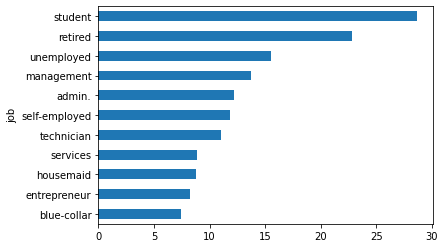

In [30]:
(df.groupby('job')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='marital'>

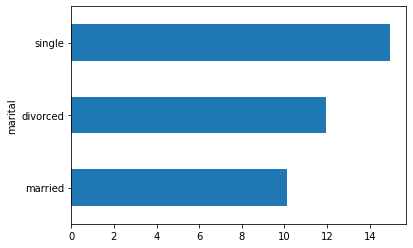

In [31]:
(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='education_qual'>

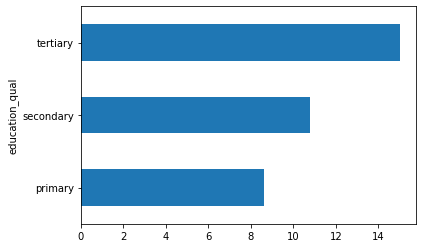

In [32]:
(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='call_type'>

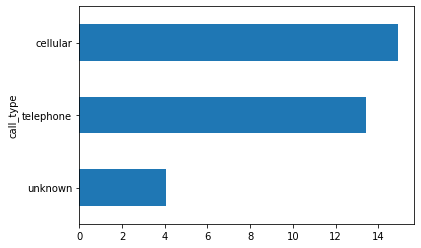

In [33]:
(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='mon'>

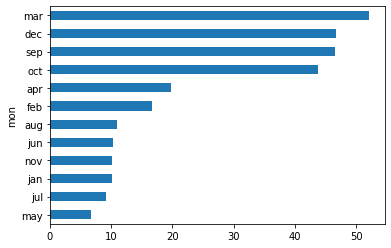

In [34]:
(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='prev_outcome'>

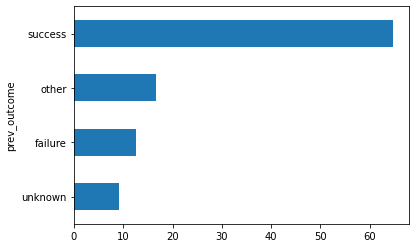

In [35]:
(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind='barh')

In [36]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0


<AxesSubplot:xlabel='y', ylabel='age'>

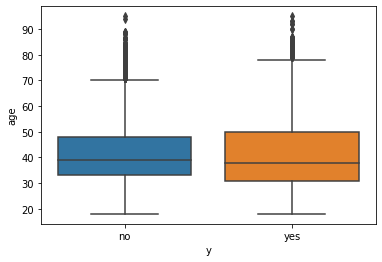

In [37]:
%matplotlib inline
import seaborn as sns
sns.boxplot(data=df, x= 'y',y= 'age')

<AxesSubplot:xlabel='y', ylabel='day'>

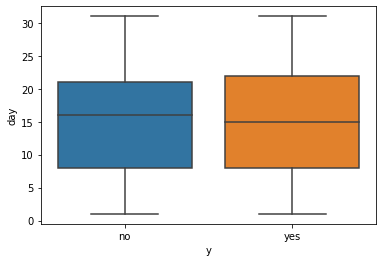

In [38]:
sns.boxplot(data=df, x= 'y',y= 'day')

<AxesSubplot:xlabel='y', ylabel='dur'>

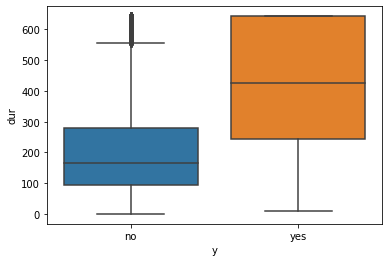

In [39]:
sns.boxplot(data=df, x= 'y',y= 'dur')

<AxesSubplot:xlabel='y', ylabel='num_calls'>

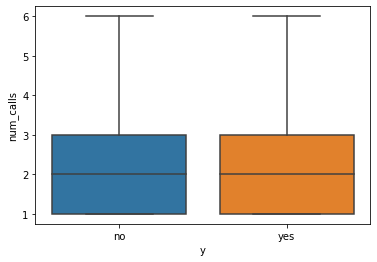

In [40]:
sns.boxplot(data=df, x= 'y',y= 'num_calls')

# **Label Encoding**

In [41]:
df.job =df['job'].map({"blue-collar" :0,'management' :7,'technician' :4,'admin.' :6,'services' :3,'retired' :9,'self-employed' :5,'entrepreneur' :1,'unemployed' :8,'housemaid' :2,'student' :10})

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [42]:
df.marital = df.marital.map({"married":0,'single':2,'divorced':1}) 


In [43]:
df.education_qual = df.education_qual.map({'secondary':1,'tertiary':2,'primary':0})

In [44]:
df.call_type= df.call_type.map({'cellular':2,'unknown':0,"telephone":1})

In [45]:
df.mon = df.mon.map({'may':0,'jul':1,'aug':5,'jun':4,'nov':3,'apr':7,'feb':6,'jan':2,'oct':8,'sep':9,'mar':11,'dec':10})

In [46]:
df.prev_outcome= df.prev_outcome.map({'unknown':0,'failure':1,"other":2,"success":3})

In [47]:
df.dtypes

age                 int64
job                 int64
marital             int64
education_qual      int64
call_type           int64
day                 int64
mon                 int64
dur               float64
num_calls         float64
prev_outcome        int64
y                  object
target              int64
dtype: object

In [48]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261.0,1.0,0,no,0
1,44,4,2,1,0,5,0,151.0,1.0,0,no,0
2,33,1,0,1,0,5,0,76.0,1.0,0,no,0
3,47,0,0,1,0,5,0,92.0,1.0,0,no,0
4,33,0,2,1,0,5,0,198.0,1.0,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,2,2,17,3,643.0,3.0,0,yes,1
45207,71,9,1,0,2,17,3,456.0,2.0,0,yes,1
45208,72,9,0,1,2,17,3,643.0,5.0,3,yes,1
45209,57,0,0,1,1,17,3,508.0,4.0,0,no,0


# **Balancing the data**

In [49]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

X = df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values 
y = df['target'].values

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

X = df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values 
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

X = df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values 
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [ ]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score =  mean(scores))

# **Fitting the Model**

Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression 
logistic_regression= LogisticRegression() 
logistic_regression.fit(X_train,y_train) 
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
logistic_regression.predict_proba(X_test)

array([[0.34308264, 0.65691736],
       [0.40677184, 0.59322816],
       [0.20625826, 0.79374174],
       ...,
       [0.03465287, 0.96534713],
       [0.15695987, 0.84304013],
       [0.96413318, 0.03586682]])

In [52]:
logistic_regression.coef_

array([[-0.04733153,  0.2107384 , -0.1620903 , -0.70341071,  0.03399585,
        -0.04767887,  0.36837664,  0.01163236, -0.20269072,  1.15253651]])

In [53]:
logistic_regression.intercept_

array([-1.73085377])

In [54]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test,y_pred)
score

0.8766739687820064

KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 


# define pipeline
steps = [('over', SMOTE()), ('model', KNeighborsClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for i in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1))) 

K value  :  1  train score :  1.0  cv score :  0.799938309036813
K value  :  2  train score :  0.9998361908922136  cv score :  0.7997212048486334
K value  :  3  train score :  0.9955589530777911  cv score :  0.7996285550399596
K value  :  4  train score :  0.9957409631975538  cv score :  0.7997021761583232
K value  :  5  train score :  0.9882239452513559  cv score :  0.7999333299515494
K value  :  6  train score :  0.9886425685268101  cv score :  0.7991463859247147
K value  :  7  train score :  0.9791962433111281  cv score :  0.7994563690314754
K value  :  8  train score :  0.9801426959338939  cv score :  0.7998168091267626
K value  :  9  train score :  0.9709147828619271  cv score :  0.7995402723830242
K value  :  10  train score :  0.9714244111972625  cv score :  0.8000939499206178
K value  :  20  train score :  0.9439772851370536  cv score :  0.799194252159863
K value  :  40  train score :  0.9181318481307561  cv score :  0.7997142632890882
K value  :  80  train score :  0.890884933

In [57]:
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)
y_pred = knn.predict(X_test)

In [58]:
score = roc_auc_score(y_test, y_pred)
score

0.9564947795345431

Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for depth in [1,2,3,4,5,6,7,8,9,10,20,35,40,45]:
  dt = DecisionTreeClassifier(max_depth=depth) 
  dt.fit(X_train, y_train) 
  valscore = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1) 
  print("Depth  : ", depth, " train_score : ", dt.score(X_train,y_train), " Cross val score : " ,np.mean(valscore))


Depth  :  1  train_score :  0.7835535655782462  Cross val score :  0.7011974852027548
Depth  :  2  train_score :  0.8091623894288522  Cross val score :  0.7020726489746798
Depth  :  3  train_score :  0.8639656364893888  Cross val score :  0.7021304673409652
Depth  :  4  train_score :  0.9013141130646865  Cross val score :  0.7047053505156384
Depth  :  5  train_score :  0.9135451931127371  Cross val score :  0.7033308007713793
Depth  :  6  train_score :  0.9284154198973463  Cross val score :  0.7015407811775805
Depth  :  7  train_score :  0.9373339157657166  Cross val score :  0.6996033937383886
Depth  :  8  train_score :  0.9470896581849951  Cross val score :  0.7023361175068229
Depth  :  9  train_score :  0.9532233992209966  Cross val score :  0.705484082655883
Depth  :  10  train_score :  0.963306759855848  Cross val score :  0.7062464057734557
Depth  :  20  train_score :  0.9990353463652579  Cross val score :  0.7058304020281863
Depth  :  35  train_score :  1.0  Cross val score :  0

In [60]:
dt = DecisionTreeClassifier(max_depth = 4)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [62]:
from sklearn.metrics import  roc_auc_score

y_pred = dt.predict(X_test) 

acc = roc_auc_score(y_test, y_pred)
print("score: {:.2f}".format(acc))

score: 0.90


Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, max_depth = 3, max_features='sqrt')

rf.fit(X_train, y_train);

predictions = rf.predict(X_test)


In [64]:
score = roc_auc_score(y_test, predictions)
score

0.9034529304942969

XG Boost

In [65]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score

# define pipeline
steps = [('over', SMOTE()), ('model', XGBClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train,y_train) 
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)))

Learning rate :  0.01  Train score :  0.9431400385861454  Cross-Val score :  0.9293445436632081
Learning rate :  0.02  Train score :  0.9522223435623021  Cross-Val score :  0.9298836815203682
Learning rate :  0.03  Train score :  0.9601943868079065  Cross-Val score :  0.9293123757291809
Learning rate :  0.04  Train score :  0.9650722580175458  Cross-Val score :  0.9290468178000368
Learning rate :  0.05  Train score :  0.9688762695205854  Cross-Val score :  0.9292983634769609
Learning rate :  0.06  Train score :  0.9716064213170252  Cross-Val score :  0.9295609543941747
Learning rate :  0.07  Train score :  0.9740817589457974  Cross-Val score :  0.9293881696542965
Learning rate :  0.08  Train score :  0.9758472571074952  Cross-Val score :  0.9297357754340587
Learning rate :  0.09  Train score :  0.9776309562811692  Cross-Val score :  0.9289553663795707
Learning rate :  0.1  Train score :  0.9784682028320775  Cross-Val score :  0.9291323469648022
Learning rate :  0.11  Train score :  0.9

In [67]:
model = xgb.XGBClassifier(learning_rate = 1, n_estimators=100)
model.fit(X_train,y_train) 

y_pred = model.predict(X_test)
 
score = roc_auc_score(y_test, y_pred)
score

0.9743728550825663

# **Feature Importance**

In [70]:
original_feature_list = list(df.columns[:-2])
original_feature_list

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [73]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: dur                  Importance: 0.45
Variable: prev_outcome         Importance: 0.15
Variable: call_type            Importance: 0.13
Variable: mon                  Importance: 0.12
Variable: marital              Importance: 0.05
Variable: education_qual       Importance: 0.05
Variable: job                  Importance: 0.03
Variable: age                  Importance: 0.01
Variable: num_calls            Importance: 0.01
Variable: day                  Importance: 0.0
